# Import Libraries

In [ ]:
import math
import seaborn as sns
import datetime as dt
from datetime import datetime    
sns.set_style("whitegrid")
from pandas.plotting import autocorrelation_plot
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use("ggplot")
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split


In [ ]:
# load the model
new_model = keras.models.load_model('cnn_lstm_original_model.keras')

# Data Preprocessing & Analysis

In [ ]:
# For data preprocessing and analysis part

data = pd.read_csv('../../Datasets/NFLX.csv')

data.dropna(inplace=True)
data.head()

data.reset_index(drop=True, inplace=True)

numeric_columns = data.select_dtypes(include=['float64', 'int64']).columns
data[numeric_columns] = data[numeric_columns].fillna(data[numeric_columns].mean())
data.head()

df2 = data.drop('Date', axis=1)

print(df2)

X = []
Y = []
window_size=100
for i in range(1 , len(df2) - window_size -1 , 1):
    first = df2.iloc[i,4]
    temp = []
    temp2 = []
    for j in range(window_size):
        temp.append((df2.iloc[i + j, 4] - first) / first)
    temp2.append((df2.iloc[i + window_size, 4] - first) / first)
    X.append(np.array(temp).reshape(100, 1))
    Y.append(np.array(temp2).reshape(1, 1))

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, shuffle=False)

train_X = np.array(x_train)
test_X = np.array(x_test)
train_Y = np.array(y_train)
test_Y = np.array(y_test)

train_X = train_X.reshape(train_X.shape[0],1,100,1)
test_X = test_X.reshape(test_X.shape[0],1,100,1)

print(len(train_X))
print(len(test_X))

        Open      High      Low   Close   Volume
0      12.48   12.6000   11.520   11.92  1619200
1      11.92   11.9500   11.250   11.66  2478900
2      11.74   11.7400   11.090   11.20  1818900
3      11.20   11.3700   11.010   11.05  1181900
4      11.11   11.5500   11.000   11.12  1070100
...      ...       ...      ...     ...      ...
2512  336.51  343.4900  335.990  342.10   773201
2513  341.91  346.3895  339.740  340.05  1263921
2514  335.79  343.7300  333.570  341.93  1229798
2515  341.00  343.9800  339.772  343.23  1001603
2516  343.23  345.7400  341.510  341.61  1232539

[2517 rows x 5 columns]
1932
483


In [ ]:
# Evaluate the model
new_model.evaluate(test_X, test_Y)

16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.6504 - mae: 0.5085 - mse: 0.6504


[0.6471147537231445, 0.6471147537231445, 0.52187579870224]

In [ ]:
# Make predictions
predicted  = new_model.predict(test_X)
test_label = test_Y.reshape(-1,1)
predicted = np.array(predicted[:,0]).reshape(-1,1)
len_t = len(train_X)
for j in range(len_t , len_t + len(test_X)):
    temp = data.iloc[j,3]
    test_label[j - len_t] = test_label[j - len_t] * temp + temp
    predicted[j - len_t] = predicted[j - len_t] * temp + temp


16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 50ms/step


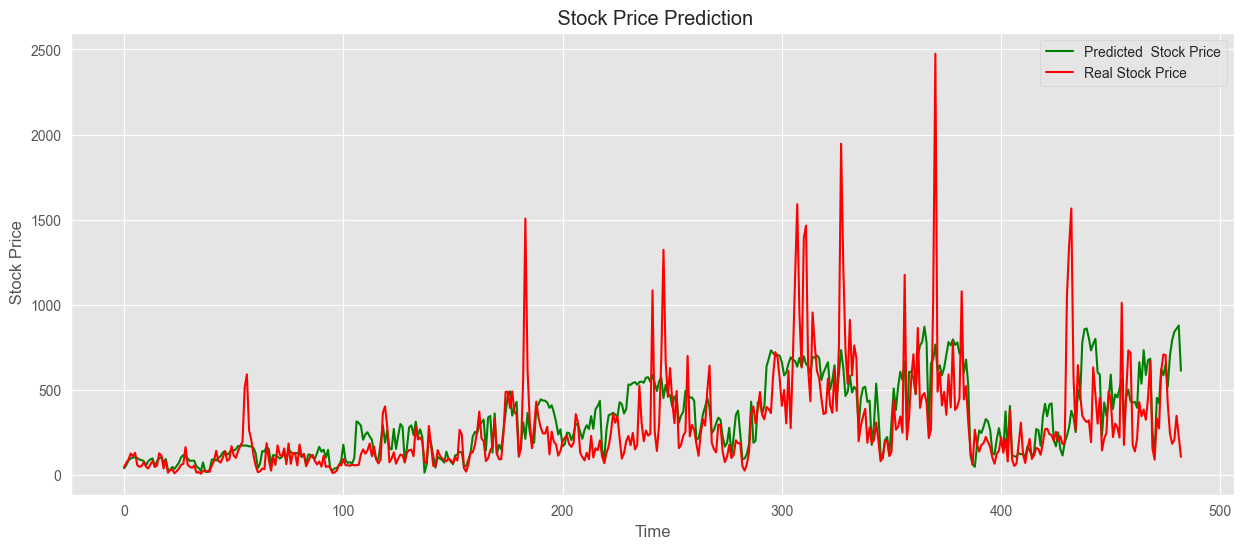

In [10]:

plt.figure(figsize=(15,6))
plt.plot(predicted, color = 'green', label = 'Predicted  Stock Price')
plt.plot(test_label, color = 'red', label = 'Real Stock Price')
plt.title(' Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel(' Stock Price')
plt.legend()
plt.show()

# Performance Evaluation

In [11]:
# Performance Metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error,r2_score


# Calculate performance metrics
mse = mean_squared_error(test_label, predicted)
rmse = np.sqrt(mse)
mae = mean_absolute_error(test_label, predicted)
mape = np.mean(np.abs((test_label - predicted) / test_label)) * 100
r2 = r2_score(test_label, predicted)
# r2 = r2_score(actual_prices, predictions)

# Print performance metrics
print("\nPerformance Metrics:")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}%")
print(f"R2 Score: {r2:.3f}")


Performance Metrics:
Mean Squared Error (MSE): 54362.0393878346
Root Mean Squared Error (RMSE): 233.1566842014927
Mean Absolute Error (MAE): 139.5369520132465
Mean Absolute Percentage Error (MAPE): 62.29%
R2 Score: 0.345


In [12]:
def save_metrics(test_label, predicted, model_name, stock_name):
    """
    Calculate metrics and save to CSV 
    """
    # Calculate metrics
    mse = mean_squared_error(test_label, predicted)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(test_label, predicted)
    mape = np.mean(np.abs((test_label - predicted) / test_label)) * 100
    r2 = r2_score(test_label, predicted)
    
    # Round to 4 decimal places
    rmse = round(rmse, 4)
    mae = round(mae, 4)
    mape = round(mape, 4)
    r2 = round(r2, 4)
    mse = round(mse, 4)
    
    # Create metrics dictionary
    metrics = {
        'Model': [model_name],
        'Stock': [stock_name],
        'RMSE': [rmse],
        'MAE': [mae],
        'MAPE': [mape],
        'R2': [r2]
    }
    
    # Convert to DataFrame
    df_metrics = pd.DataFrame(metrics)
    
    # Save to CSV
    filename = f'metrics_{model_name}_{stock_name}.csv'
    df_metrics.to_csv(filename, index=False)
    
    # Print metrics
    print(f"\nMetrics for {model_name} on {stock_name}:")
    print(f"Mean Squared Error (MSE): {mse:.4f}")
    print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
    print(f"Mean Absolute Error (MAE): {mae:.4f}")
    print(f"Mean Absolute Percentage Error (MAPE): {mape:.4f}%")
    print(f"R² Score: {r2:.4f}")

In [13]:
# Save metrics to CSV
save_metrics(test_label, predicted, "CNN-LSTM-Baseline", "NFLX")  


Metrics for CNN-LSTM-Baseline on NFLX:
Mean Squared Error (MSE): 54362.0394
Root Mean Squared Error (RMSE): 233.1567
Mean Absolute Error (MAE): 139.5370
Mean Absolute Percentage Error (MAPE): 62.2876%
R² Score: 0.3448
